In [39]:
from tqdm import tqdm

In [4]:
!pip install pydotplus

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/278.7 kB ? eta -:--:--
     ---- -------------------------------- 30.7/278.7 kB 445.2 kB/s eta 0:00:01
     ---- -------------------------------- 30.7/278.7 kB 445.2 kB/s eta 0:00:01
     ---- -------------------------------- 30.7/278.7 kB 445.2 kB/s eta 0:00:01
     ---- -------------------------------- 30.7/278.7 kB 445.2 kB/s eta 0:00:01
     ---- -------------------------------- 30.7/278.7 kB 445.2 kB/s eta 0:00:01
     -------- ---------------------------- 61.4/278.7 kB 164.1 kB/s eta 0:00:02
     --------- --------------------------- 71.7/278.7 kB 171.1 kB/s eta 0:00:02
     ------------ ------------------------ 92.2/278.7 kB 218.5 kB/s eta 0:00:01
     -------------- --------------------- 112.6/278.7 kB 252.2 kB/s eta 0:00:01
     -------------- --------------------- 112.6/278.7 kB 252.2 kB/s eta 0:00:01
     --------------- -------------------- 122.9/278.7

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn import preprocessing, metrics

In [2]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [6]:
# Plot tree helper libraries
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree


def plot_tree(model,filename = "tree.png"):
    #global churn_df 

    dot_data = StringIO()
  

    featureNames = [colunm  for colunm in churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']].columns]
    out=tree.export_graphviz(model,feature_names=featureNames, out_file=dot_data, class_names= ['left','stay'], filled=True,  special_characters=True,rotate=False)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png(filename)
    img = mpimg.imread(filename)
    plt.figure(figsize=(100, 200))
    plt.imshow(img,interpolation='nearest')

In [7]:
def get_accuracy_bag(X,y,title,times=20,xlabel='Number Estimators'):
    #Iterate through different number of estimators and average out the results  


    N_estimators=[n for n in range(1,70)]
    times=20
    train_acc=np.zeros((times,len(N_estimators)))
    test_acc=np.zeros((times,len(N_estimators)))
    
    train_time=np.zeros((times,len(N_estimators)))
    test_time=np.zeros((times,len(N_estimators)))
     #average out the results
    for n in tqdm(range(times)):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
        for n_estimators in N_estimators:
            #Iterate through different number of estimators and average out the results   
        
            Bag= BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 10),n_estimators=n_estimators,bootstrap=True,random_state=0)
            Bag.fit(X_train,y_train)
          
            
             
            Accuracy=get_accuracy(X_train, X_test, y_train, y_test,  Bag)
           
            
            
  
            train_acc[n,n_estimators-1]=Accuracy['train Accuracy']
            test_acc[n,n_estimators-1]=Accuracy['test Accuracy']
        
        
        
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(train_acc.mean(axis=0))
    ax2.plot(test_acc.mean(axis=0),c='r')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Training accuracy',color='b')
    ax2.set_ylabel('Testing accuracy', color='r')
    plt.title(title)
    plt.show()
    
   

In [8]:
churn_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")

churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [9]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [10]:
churn_df.shape

(200, 10)

In [12]:
from sklearn.utils import resample

In [14]:
churn_df[0:5]

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [13]:
resample(churn_df[0:5])

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [15]:
resample(churn_df[0:5])

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0


In [16]:
X = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]

X.head()

,tenure,age,address,income,ed,employ,equip
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0


In [17]:
y = churn_df['churn']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int32

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)
print ('Train set', X_train.shape,  y_train.shape)
print ('Test set', X_test.shape,  y_test.shape)

Train set (140, 7) (140,)
Test set (60, 7) (60,)


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=10)

In [21]:
Tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10)

In [22]:
Tree

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10)

In [23]:
Tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10)

In [24]:
yhat = Tree.predict(X_test)

In [ ]:
plot_tree(filename = "tree.png",model=Tree)

In [26]:
!pip install graphviz

  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.1 kB 320.0 kB/s eta 0:00:01
   -------------------------- ------------- 30.7/47.1 kB 259.2 kB/s eta 0:00:01
   -------------------------- ------------- 30.7/47.1 kB 259.2 kB/s eta 0:00:01
   -------------------------- ------------- 30.7/47.1 kB 259.2 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 138.7 kB/s eta 0:00:00


In [29]:
get_accuracy(X_train, X_test, y_train, y_test,  Tree)

{'test Accuracy': 0.6166666666666667, 'train Accuracy': 0.9071428571428571}

In [32]:
max_depth = 5
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=5)
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = max_depth,random_state=8)
Tree.fit(X_train,y_train)
print(get_accuracy(X_train, X_test, y_train, y_test,  Tree))
# plot_tree(filename = "tree1.png",model=Tree)

{'test Accuracy': 0.65, 'train Accuracy': 0.9357142857142857}


In [33]:
from sklearn.ensemble import BaggingClassifier

In [34]:
base_estimator = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=4)
Bag = BaggingClassifier(base_estimator=base_estimator, n_estimators=30, random_state=0, bootstrap=True)

In [35]:
Bag.fit(X_train, y_train)

C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=4,
                                                        random_state=4),
                  n_estimators=30, random_state=0)

In [36]:
Bag.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [37]:
print(get_accuracy(X_train, X_test, y_train, y_test,  Bag))

{'test Accuracy': 0.7, 'train Accuracy': 0.9071428571428571}


  0%|                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\s

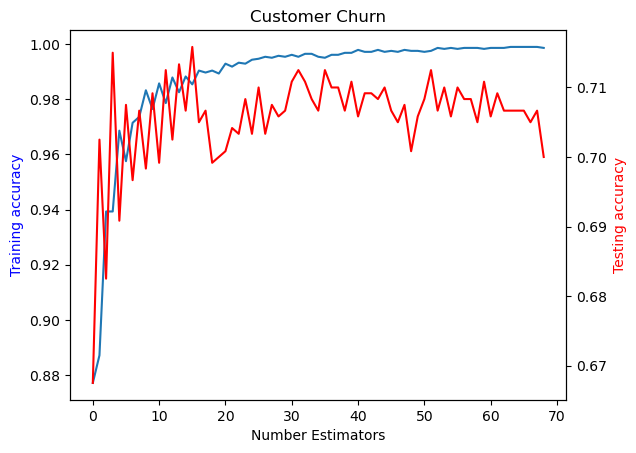

In [40]:
get_accuracy_bag(X, y, "Customer Churn")

In [41]:
from sklearn.svm import SVC

clf=SVC(kernel='linear',gamma='scale')
clf.fit(X_train, y_train) 
print(get_accuracy(X_train, X_test, y_train, y_test,  clf))

{'test Accuracy': 0.7166666666666667, 'train Accuracy': 0.7642857142857142}


In [42]:
Bag = BaggingClassifier(base_estimator=SVC(kernel='linear',gamma='scale'),n_estimators=10,random_state=0,bootstrap=True)
Bag.fit(X_train,y_train)
print(get_accuracy(X_train, X_test, y_train, y_test,  Bag))

C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


{'test Accuracy': 0.7, 'train Accuracy': 0.7785714285714286}


In [43]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv")

df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [46]:
df['BareNuc']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: BareNuc, Length: 699, dtype: object

In [47]:
df = df[df["BareNuc"] != "?"]

In [48]:
df.shape

(683, 11)

In [49]:
X =  df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

X.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [50]:
y = df['Class']

In [58]:
X_train, X_test, y_train , y_test = train_test_split(X, y, train_size=0.2, random_state=4)
X_train.shape, X_test.shape

((136, 9), (547, 9))

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
     'base_estimator__max_depth' : [2*n+1 for n in range(10) ] }
param_grid

{'n_estimators': [1,
  3,
  5,
  7,
  9,
  11,
  13,
  15,
  17,
  19,
  21,
  23,
  25,
  27,
  29,
  31,
  33,
  35,
  37,
  39],
 'base_estimator__max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}

In [61]:
Bag = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=0, bootstrap=True)

In [62]:
search = GridSearchCV(estimator=Bag, param_grid=param_grid, scoring='accuracy', cv=3)

In [63]:
search.fit(X_train, y_train)

C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\model_

GridSearchCV(cv=3,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=0),
             param_grid={'base_estimator__max_depth': [1, 3, 5, 7, 9, 11, 13,
                                                       15, 17, 19],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

In [64]:
search.best_score_

0.9851851851851853

In [65]:
search.best_params_

{'base_estimator__max_depth': 5, 'n_estimators': 35}

In [66]:
get_accuracy(X_train, X_test, y_train=y_train, y_test=y_test, model=search.best_estimator_)

{'test Accuracy': 0.9597806215722121, 'train Accuracy': 1.0}

In [67]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv", delimiter=",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [68]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [69]:
y = df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [73]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])
X[:,1] = le_sex.transform(X[:,1])

In [74]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

In [76]:
df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [77]:
le_Cholesterol = preprocessing.LabelEncoder()
le_Cholesterol.fit(['NORMAL', 'HIGH'])
X[:,3] = le_Cholesterol.transform(X[:,3])

In [78]:
df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [81]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 5) (160,)
Test set: (40, 5) (40,)


In [82]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
     'base_estimator__max_depth' : [2*n+1 for n in range(10) ]}

In [84]:
Bag = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=0, bootstrap=True)
search = GridSearchCV(estimator=Bag, param_grid=param_grid, scoring='accuracy', cv=3)

In [85]:
search.fit(X_train, y_train)

C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\model_

GridSearchCV(cv=3,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=0),
             param_grid={'base_estimator__max_depth': [1, 3, 5, 7, 9, 11, 13,
                                                       15, 17, 19],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

In [86]:
search.best_score_

1.0

In [87]:
search.best_params_

{'base_estimator__max_depth': 5, 'n_estimators': 9}

In [88]:
print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

{'test Accuracy': 0.95, 'train Accuracy': 1.0}


In [ ]:
get_accuracy_bag(X, y, "Drug Data")

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\s